In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=2,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)
scheduler_info=client.scheduler_info()

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44351 instead
  warnings.warn(


In [3]:
len(client.scheduler_info()['workers'])

2

In [4]:
from skylens import *
from survey_utils import *

In [5]:
#only for python3
import importlib
reload=importlib.reload

In [6]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [7]:
wigner_files={}
# wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
# wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'
wig_home='/verafs/scratch/phy200040p/sukhdeep/physics2/skylens/temp/'
wigner_files[0]= wig_home+'dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= wig_home+'/dask_wig3j_l3500_w2100_2_reorder.zarr'


# Power Spectrum covariance

In [75]:
#setup parameters
lmax_cl=2000
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-1
Nl_bins=20
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins)))
l_bins=np.append(0,l_bins)
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl+0.01),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False
Tri_cov=False

In [76]:
l_bins,l_bins.shape

(array([   0,   10,   13,   17,   23,   30,   40,   53,   70,   92,  122,
         162,  214,  283,  374,  494,  652,  862, 1139, 1506, 1989]),
 (21,))

In [9]:
xi_win_approx=True
do_xi=True
bin_xi=True
bin_cl=True
th_min=25/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th*d2r,'s1_s2':[(2,2),(2,-2),(0,0),(0,2)]}
WT=wigner_transform(**WT_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide


In [10]:
nside=64
window_lmax=nside*3-1

In [11]:
use_window=True
do_cov=True

In [12]:
f_sky=0.3

In [14]:
unit_window=True

In [55]:
??set_window

In [15]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside,unit_win=unit_window,f_sky=f_sky,use_shot_noise=False)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:74: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide


Win gen: step size 384 True False 383 31.0
Window done. Size: 1.6e-05


../skylens/survey_utils.py:126: RuntimeWarning: invalid value encountered in sqrt
  cl_map_noise=np.sqrt(cl_map)


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally

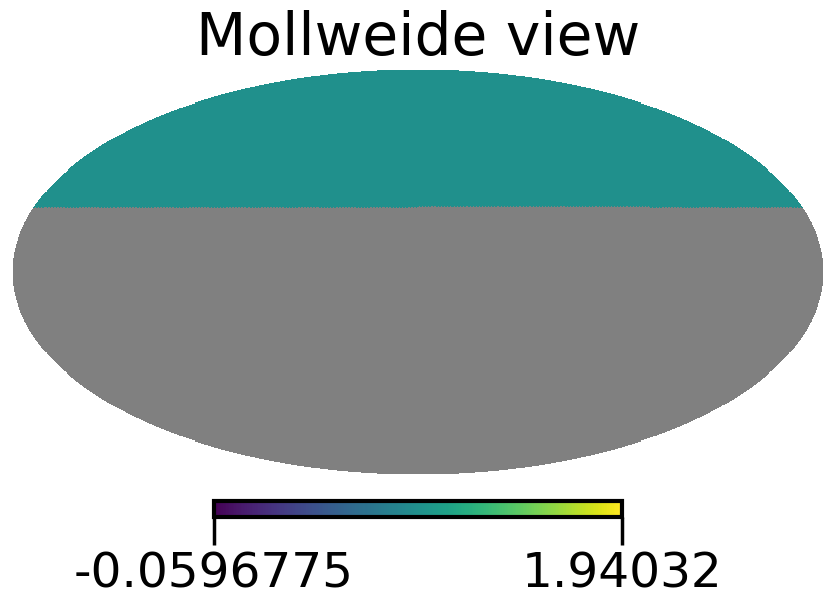

In [53]:
hp.mollview(zs_bin1[0]['window'])

In [16]:
store_win=True

In [17]:
do_pseudo_cl=True

In [18]:
import skylens
reload(skylens)
from skylens import *

In [19]:
#use all ell

#no window, c_ell
use_binned_l=False
kappa00=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=False,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       sparse_cov=False,scheduler_info=scheduler_info,
                                        do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                        xi_win_approx=xi_win_approx
                                       )

In [20]:
#use all ell
use_binned_l=False

#with windows, full binnning
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                                       store_win=store_win,window_lmax=window_lmax,
                                       scheduler_info=scheduler_info,
                                       sparse_cov=False,
                                        do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                        xi_win_approx=xi_win_approx

                                       )

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:262: RuntimeWarning: invalid value encountered in sqrt
  map1=np.sqrt(z_bin1['window'])


In [77]:
use_binned_l=True
use_binned_theta=True
#with window, iMaster.
kappa_b=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                use_window=use_window,Tri_cov=Tri_cov,
                use_binned_l=use_binned_l,wigner_files=wigner_files,
                SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=f_sky,
                store_win=store_win,window_lmax=window_lmax,
                scheduler_info=scheduler_info,
                sparse_cov=False,use_binned_theta=use_binned_theta,
                do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                xi_win_approx=xi_win_approx
            )
use_binned_l=False
use_binned_theta=False


/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:74: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:262: RuntimeWarning: invalid value encountered in sqrt
  map1=np.sqrt(z_bin1['window'])


In [22]:
bi=(0,0)

In [23]:
dl=l_bins[1:]-l_bins[:-1]

In [24]:
kappa0.l_bins

array([  10,   13,   17,   23,   30,   40,   53,   70,   92,  122,  162,
        214,  283,  374,  494,  652,  862, 1139, 1506, 1989])

In [25]:
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [26]:
%time cl00G=kappa00.cl_tomo() 
%time cl0G=kappa0.cl_tomo() 
%time clbG=kappa_b.cl_tomo() 

In [27]:
cl00=client.compute(cl00G['stack']).result()
cl0=client.compute(cl0G['stack']).result()
clb=client.compute(clbG['stack']).result()

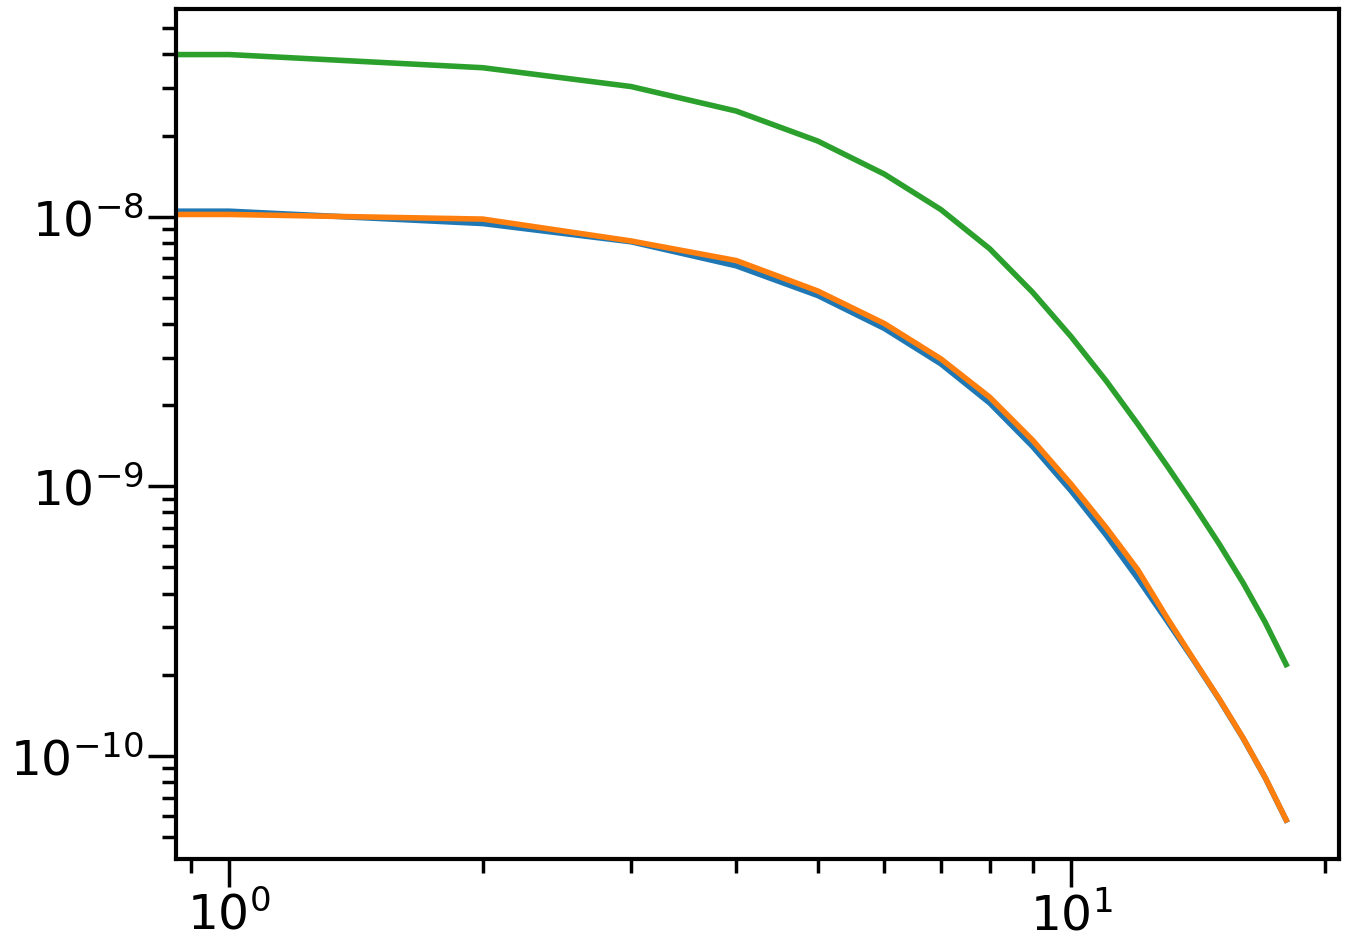

In [28]:
plot(cl0['pcl_b'])
plot(clb['pcl_b'])
plot(cl00['pcl_b'])
loglog()
show()

In [29]:
clb['pcl_b']/cl0['pcl_b']

array([0.78092057, 0.97248387, 1.03906058, 1.00687286, 1.04632208,
       1.03946639, 1.04306308, 1.04362605, 1.05121379, 1.05569551,
       1.05833555, 1.0666094 , 1.07715952, 1.02616187, 1.00640595,
       1.00427474, 1.00306166, 1.00245178, 1.00184559])

In [30]:
cl00['pcl_b']/clb['pcl_b'] #~4pi fsky.

array([4.92002209, 3.91798371, 3.64188232, 3.73901417, 3.58446701,
       3.59883226, 3.58190213, 3.57856614, 3.55181744, 3.53549512,
       3.52694641, 3.50055772, 3.46899185, 3.66357593, 3.74435683,
       3.75456069, 3.7600498 , 3.76278766, 3.76790372])

In [31]:
np.diag(clb['cov']/cl0['cov'])

<ipython-input-31-156bccaf4f69>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(clb['cov']/cl0['cov'])


array([0.75254447, 0.88350308, 1.08361698, 0.9370812 , 0.99180775,
       1.00206709, 0.97224839, 0.94996605, 0.97656335, 0.9790178 ,
       0.97357996, 0.98146728, 0.97439481, 0.97458334, 0.97465207,
       0.98088772, 0.97890842, 0.98064929, 1.13301333])

In [32]:
def corr_matrix(cov=[]):
    err=np.sqrt(np.diag(cov))
    corr=cov/np.outer(err,err)
    return corr

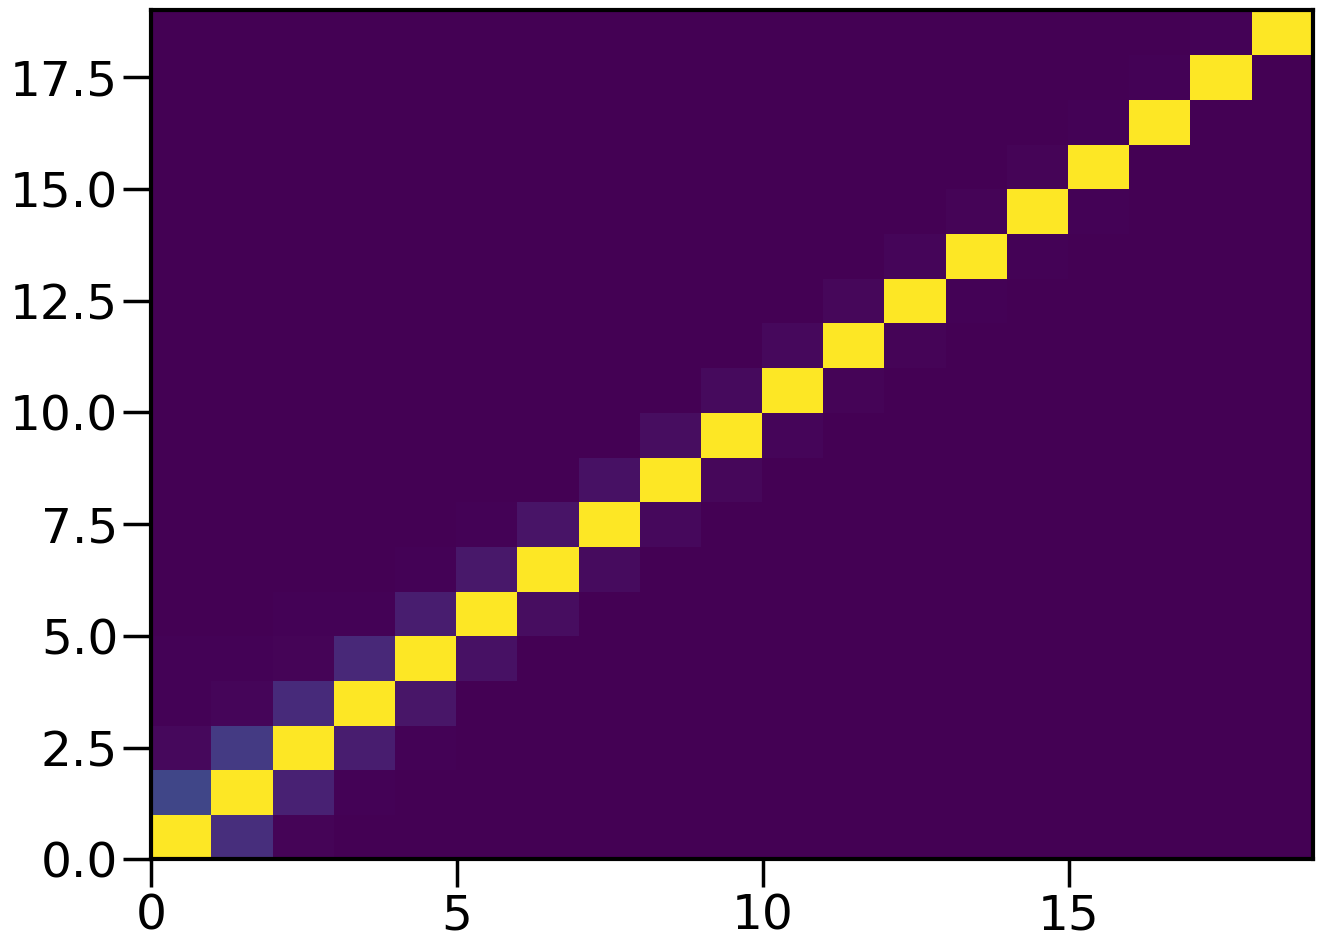

In [33]:
pcolor(corr_matrix(clb['cov']))
plt.show()

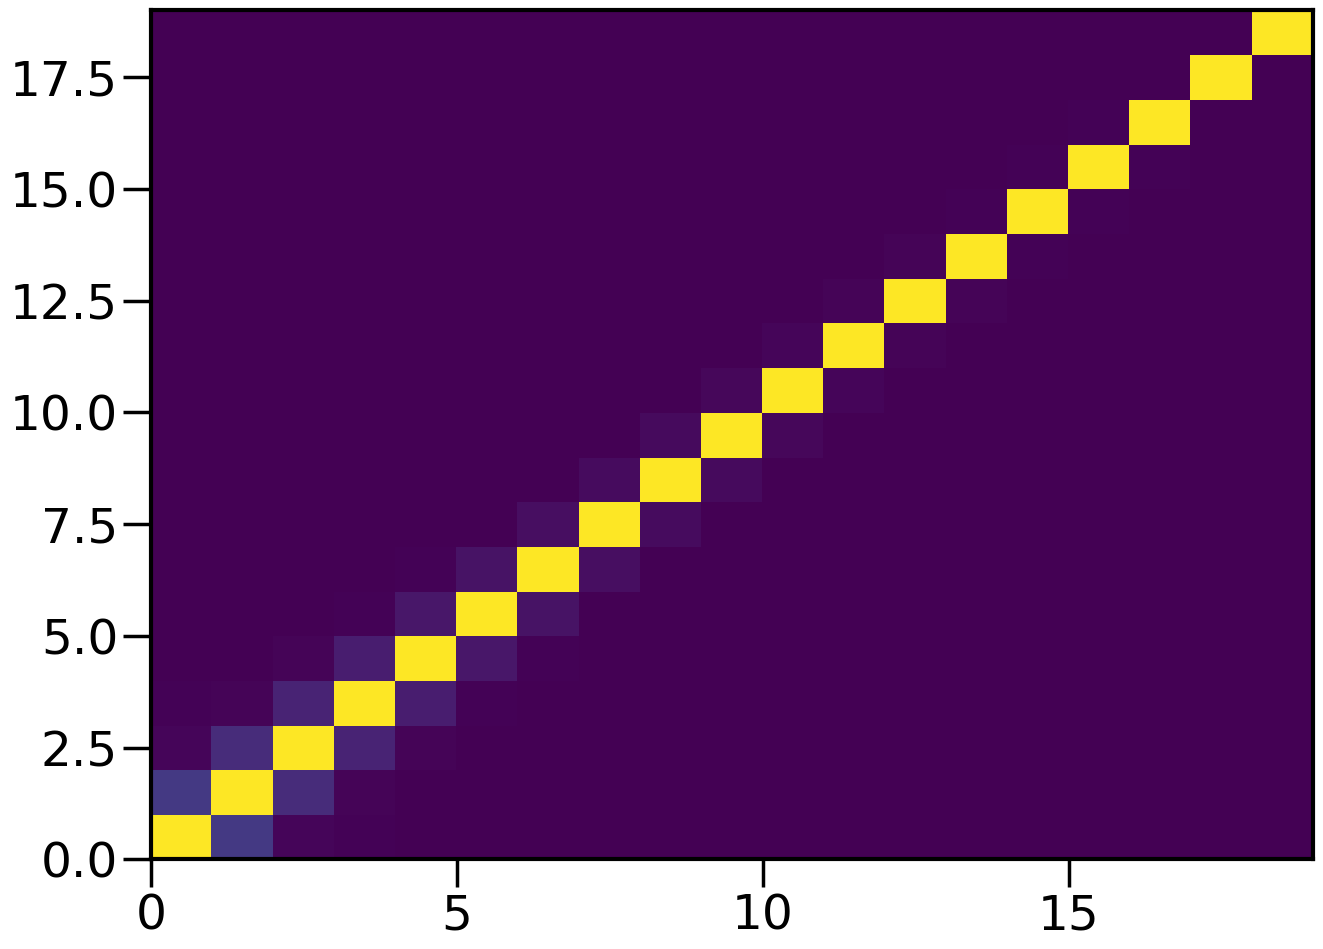

In [34]:
pcolor(corr_matrix(cl0['cov']))

In [35]:
np.diag(cl00['cov']/cl0['cov'])

<ipython-input-35-57a6f7b9c0bb>:1: RuntimeWarning: invalid value encountered in true_divide
  np.diag(cl00['cov']/cl0['cov'])


array([  38.48390816,   46.32727872,   56.40545467,   72.7086057 ,
         91.13942087,  117.54859428,  151.74101624,  196.10253961,
        254.07568596,  332.59118268,  436.53210813,  572.34297755,
        752.44773514,  989.90469097, 1302.83727535, 1716.20828989,
       2262.49355838, 2982.62226754, 3931.07401445])

In [36]:
2*cl00['pcl_b']**2/np.diag(cl00['cov'])/(2*lb+1)/dl

array([0.15770844, 0.12229499, 0.09277058, 0.07036724, 0.05362725,
       0.0404982 , 0.0306943 , 0.0233406 , 0.01770055, 0.01334944,
       0.01008905, 0.00763792, 0.00578161, 0.00437843, 0.00331757,
       0.00251218, 0.00190095, 0.00143812, 0.001088  ])

In [78]:
%time xi00G=kappa00.xi_tomo() 
%time xi0G=kappa0.xi_tomo()  

In [79]:
%time xibG=kappa_b.xi_tomo()

In [80]:
xi00=client.compute(xi00G['stack']).result()
xi0=client.compute(xi0G['stack']).result()
xib=client.compute(xibG['stack']).result()

In [81]:
kappa_b.WT_binned[corr_ll][(2,2)][bi].shape

(20, 20)

[]

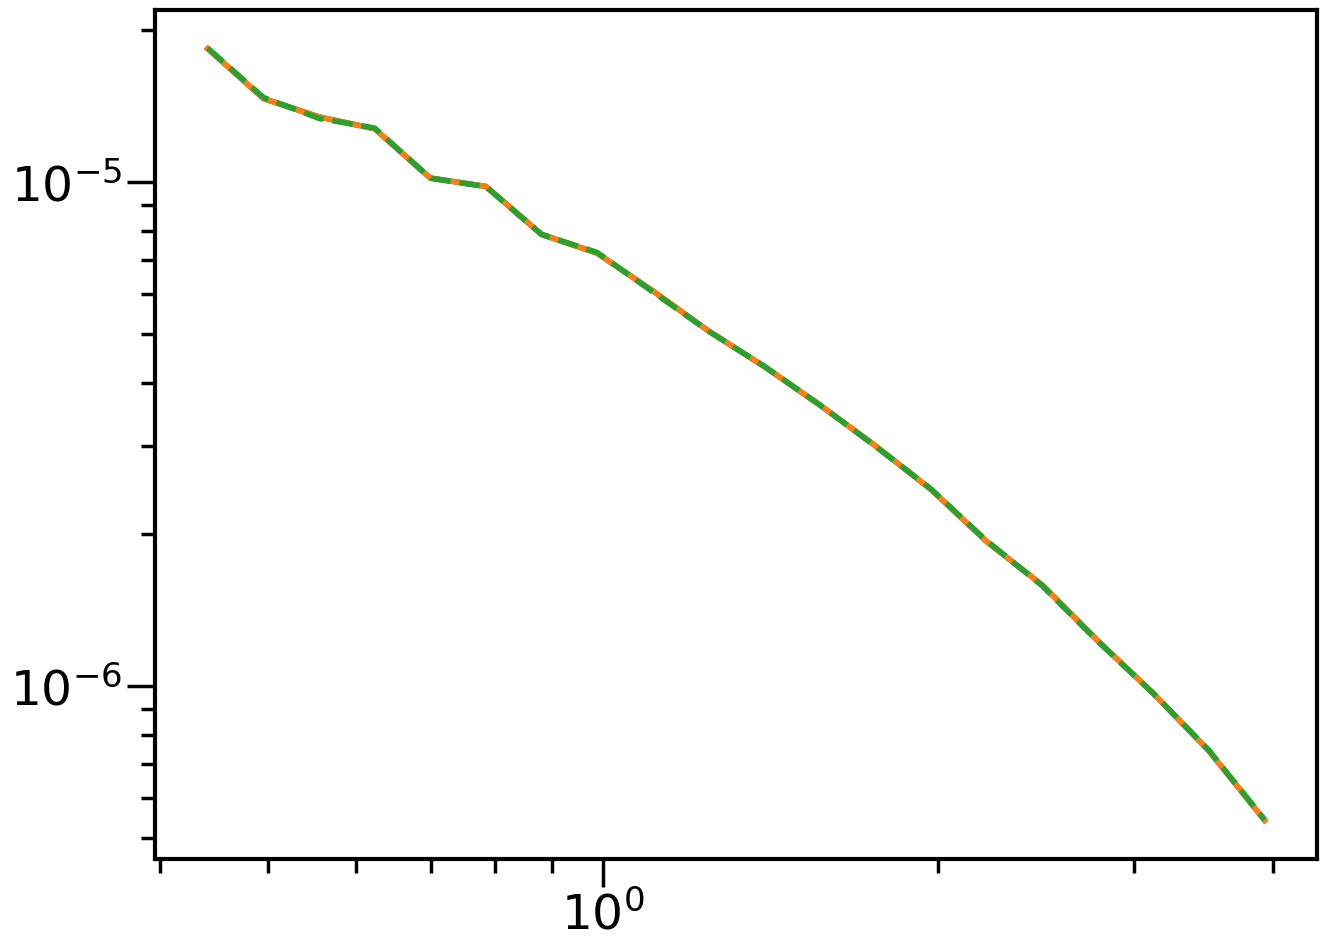

In [82]:
plot(thb,xi00['xi'][0:20])
plot(thb,xi0['xi'][0:20])
plot(thb,xib['xi'][0:20],'--')
loglog()

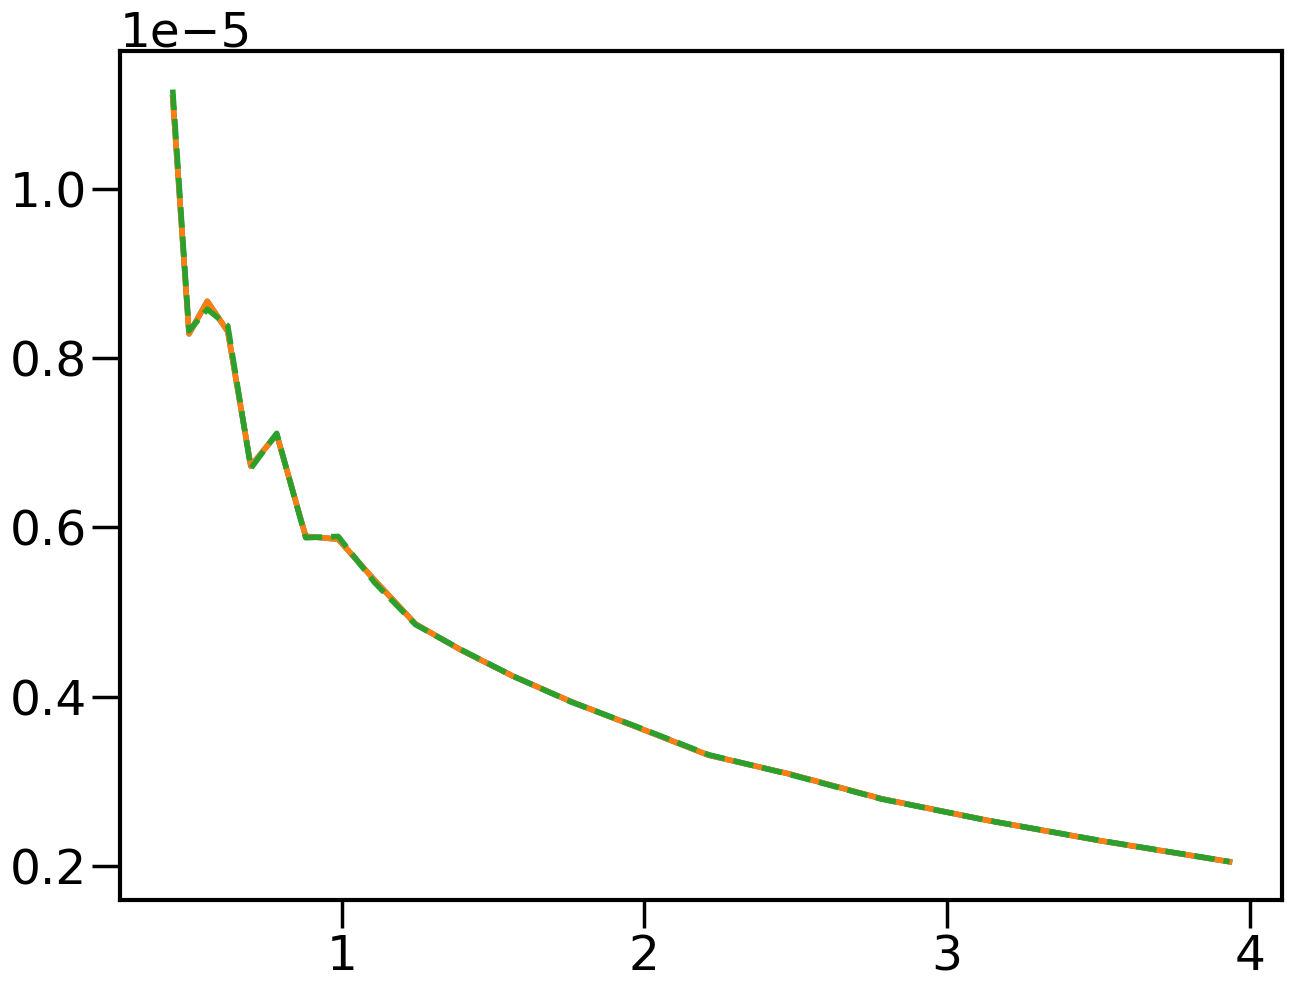

In [83]:
plot(thb,xi00['xi'][20:])
plot(thb,xi0['xi'][20:])
plot(thb,xib['xi'][20:],'--')

In [84]:
xi0['xi']

array([1.83757975e-05, 1.46392179e-05, 1.34611795e-05, 1.27521525e-05,
       1.01793101e-05, 9.79886662e-06, 7.87144375e-06, 7.22246698e-06,
       6.08149291e-06, 5.06484410e-06, 4.30682049e-06, 3.61304178e-06,
       2.99719823e-06, 2.45626341e-06, 1.93572369e-06, 1.58700455e-06,
       1.23005552e-06, 9.66680210e-07, 7.43302454e-07, 5.41469912e-07,
       1.10742943e-05, 8.28520800e-06, 8.66981703e-06, 8.31236554e-06,
       6.72220008e-06, 7.09939622e-06, 5.89384352e-06, 5.85944875e-06,
       5.37402281e-06, 4.85717058e-06, 4.54694223e-06, 4.24142352e-06,
       3.94180576e-06, 3.64479991e-06, 3.30826517e-06, 3.08393785e-06,
       2.79254057e-06, 2.54411670e-06, 2.29825618e-06, 2.04952002e-06])

In [85]:
xib['xi']/xi0['xi']

array([1.00265526, 1.00509651, 0.99331252, 1.00328694, 0.99969833,
       0.99924158, 0.99945634, 1.00361951, 0.99514951, 0.99917578,
       1.00151141, 1.00015129, 0.99846362, 1.00172419, 1.00363995,
       0.99619222, 0.99723941, 0.99995831, 1.00282318, 1.00303391,
       1.00864232, 1.0042763 , 0.98913072, 1.00795978, 0.99601244,
       1.00153312, 0.99700534, 1.00565945, 0.99476415, 0.99840772,
       1.00119349, 1.00013501, 0.99899562, 1.00146352, 1.00180048,
       0.99830941, 0.99862167, 0.99996523, 1.00100379, 1.00065174])

In [86]:
xib['xi']/xi00['xi']

array([1.00266222, 1.005107  , 0.99331067, 1.00329851, 0.99970558,
       0.99924941, 0.99946481, 1.0036392 , 0.99514928, 0.99918816,
       1.00154292, 1.00018971, 0.9984997 , 1.00175232, 1.00367887,
       0.99623662, 0.99728148, 1.00002105, 1.00289319, 1.00313443,
       1.00865419, 1.00428464, 0.9891225 , 1.00797552, 0.996011  ,
       1.00154134, 0.99700443, 1.0056781 , 0.99475614, 0.99840773,
       1.00121057, 1.00015593, 0.99901192, 1.00147267, 1.00181499,
       0.99832644, 0.99863668, 0.99998904, 1.00103077, 1.00068697])

In [87]:
xi0['xi']/xi00['xi']

array([1.00000693, 1.00001044, 0.99999813, 1.00001153, 1.00000725,
       1.00000784, 1.00000848, 1.00001962, 0.99999977, 1.00001239,
       1.00003147, 1.00003841, 1.00003614, 1.00002808, 1.00003878,
       1.00004458, 1.00004219, 1.00006274, 1.00006981, 1.00010022,
       1.00001177, 1.0000083 , 0.99999169, 1.00001562, 0.99999855,
       1.00000821, 0.99999909, 1.00001854, 0.99999195, 1.00000001,
       1.00001706, 1.00002091, 1.00001631, 1.00000913, 1.00001449,
       1.00001707, 1.00001503, 1.0000238 , 1.00002696, 1.00003521])

In [88]:
np.diag(xi0['cov']/xi00['cov'])

array([1.00207948, 1.00255737, 1.0031176 , 1.00373528, 1.00437073,
       1.00498871, 1.00558046, 1.00617377, 1.00682252, 1.00759623,
       1.00856932, 1.00974597, 1.01101096, 1.01231327, 1.01377868,
       1.0155442 , 1.01749967, 1.019622  , 1.02210747, 1.02482746,
       1.00207693, 1.00255488, 1.00311431, 1.00373154, 1.00436637,
       1.00498345, 1.00557419, 1.00616635, 1.00681376, 1.00758592,
       1.00855736, 1.00973212, 1.01099482, 1.01229474, 1.01375748,
       1.01552042, 1.01747316, 1.01959265, 1.02207511, 1.02479279])

In [89]:
np.diag(xib['cov']/xi00['cov'])

array([9.25349300e+01, 6.14284995e+01, 5.30009588e+01, 5.09042534e+01,
       3.39308650e+01, 3.32519360e+01, 2.28346570e+01, 2.07265731e+01,
       1.55299929e+01, 1.17350665e+01, 9.26298765e+00, 7.10326443e+00,
       5.35286275e+00, 3.99926211e+00, 2.77197167e+00, 2.05269703e+00,
       1.38943712e+00, 9.74858646e-01, 6.57612911e-01, 3.96775173e-01,
       2.51232891e+03, 1.30632549e+03, 1.30836556e+03, 1.17651345e+03,
       7.04835691e+02, 7.43972710e+02, 4.74403042e+02, 4.44161749e+02,
       3.39494119e+02, 2.58993623e+02, 2.11330312e+02, 1.69855209e+02,
       1.35497400e+02, 1.07842367e+02, 8.25438065e+01, 6.64385322e+01,
       5.11805741e+01, 4.02973938e+01, 3.14165052e+01, 2.39548208e+01])

In [90]:
kappa0.Win.Win['cl'][corr_ll][bi]['xi_b']

array([0.26436746, 0.26422492, 0.26406442, 0.26388653, 0.26369352,
       0.26348771, 0.26326975, 0.26303623, 0.26277792, 0.26248113,
       0.26213402, 0.26173535, 0.26129494, 0.26081648, 0.26027983,
       0.25966272, 0.25897438, 0.25821243, 0.25734551, 0.25638769])